# Objetivo 2

## caixeiro viajante

### hillClimbing

In [4]:

import random

def randomSolution(tsp):
    cities = list(range(len(tsp)))
    solution = []

    for i in range(len(tsp)):
        randomCity = cities[random.randint(0, len(cities) - 1)]
        solution.append(randomCity)
        cities.remove(randomCity)

    return solution

def routeLength(tsp, solution):
    routeLength = 0
    for i in range(len(solution)):
        routeLength += tsp[solution[i - 1]][solution[i]]
    return routeLength

def getNeighbours(solution):
    neighbours = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbour = solution.copy()
            neighbour[i] = solution[j]
            neighbour[j] = solution[i]
            neighbours.append(neighbour)
    return neighbours

def getBestNeighbour(tsp, neighbours):
    bestRouteLength = routeLength(tsp, neighbours[0])
    bestNeighbour = neighbours[0]
    for neighbour in neighbours:
        currentRouteLength = routeLength(tsp, neighbour)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = neighbour
    return bestNeighbour, bestRouteLength

def hillClimbing(tsp):
    currentSolution = randomSolution(tsp)
    currentRouteLength = routeLength(tsp, currentSolution)
    neighbours = getNeighbours(currentSolution)
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    while bestNeighbourRouteLength < currentRouteLength:
        currentSolution = bestNeighbour
        currentRouteLength = bestNeighbourRouteLength
        neighbours = getNeighbours(currentSolution)
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    return currentSolution, currentRouteLength



if __name__ == "__main__":
    tsp = [
        [0, 400, 500, 300],
        [400, 0, 300, 500],
        [500, 300, 0, 400],
        [300, 500, 400, 0]
    ]

    print(hillClimbing(tsp))

([1, 2, 3, 0], 1400)


## método Simulated Anealing

0 cost= 15.844178572899516


IndexError: list index out of range

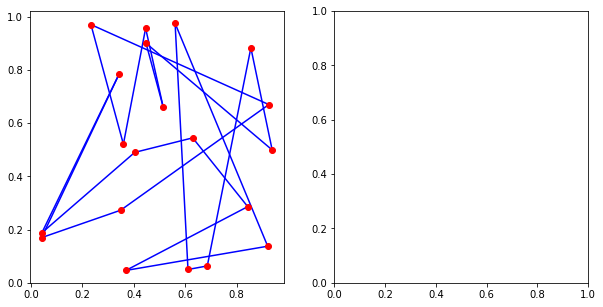

In [5]:
import numpy
import random

class Coordinate:
    def __init__ (self,x, y):
        self.x = x
        self.y = y
    def get_distance(a,b):
        return numpy.sqrt(numpy.abs(a.x-b.x)+numpy.abs(a.y-b.y))
        
    def get_total_distance(coords):
        dist = 0
        for first, second in zip (coords[:-1], coords[1:] ):
            dist += Coordinate.get_distance(first, second)
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

coords = []
for i in range(20):
    coords.append(Coordinate(numpy.random.uniform(), numpy.random.uniform()))
    
#PLot
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for first, second in zip(coords[:-1], coords[1:]):
    ax1.plot([first.x, second.x], [first.y, second.y], 'b')
ax1.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')
for c in coords:
    ax1.plot(c.x, c.y, 'ro')
    
#algoritmo Simulated anneling 
cost0 = Coordinate.get_total_distance(coords)

T = 30
factor = 0.99
T_init = T
for i in range(1000):
    print(i, 'cost=', cost0)
    
    T = T*factor
    for j in range(500):
        r1 = random.randint(0, len(coords))
        r2 = random.randint(0, len(coords))
        
        temp = coords[r1]
        coords[r1] = coords[r2]
        coords[r2] = temp
        
        cost1 = Coordinate.get_total_distance(coords)
        
        if cost1<cost0:
            cost0 = cost1
        else:
            x= numpy.random.uniform()
            if x < numpy.exp((cost0-cost1)/T):
                cost0 = cost1
            else:
                temp = coords[r1]
                coords[r1] = coords[r2]
                coords[r2] = temp


            
#PLot

for first, second in zip(coords[:-1], coords[1:]):
    ax2.plot([first.x, second.x], [first.y, second.y], 'b')
    
ax2.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')

for c in coords:
    ax1.plot(c.x, c.y, 'ro')